In [30]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohammadtalib786/retail-sales-dataset")

print("Path to dataset files:", path)


Path to dataset files: /Users/nirmal/.cache/kagglehub/datasets/mohammadtalib786/retail-sales-dataset/versions/1


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv("retail_sales_dataset.csv")

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [33]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [35]:
df.isna().sum()

# df.dropna()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [36]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [37]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [38]:
df['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [39]:
import matplotlib.pyplot as plt

In [40]:
#Quantity of products sold pee category

#aggregate / group by category
amounts=df.groupby('Product Category')['Quantity'].sum()


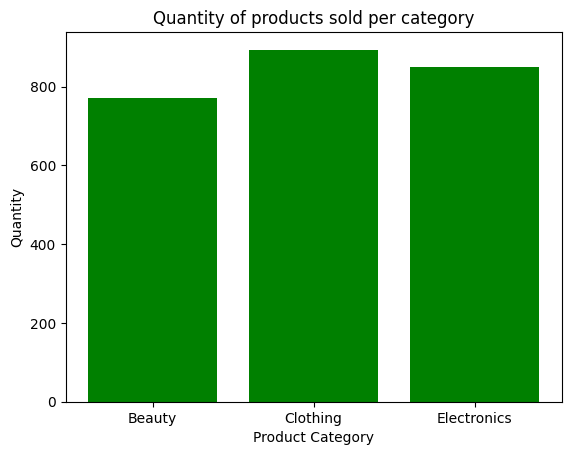

In [45]:
ax,fig=plt.subplots()
fig.set_title('Quantity of products sold per category')
fig.set_xlabel('Product Category')
fig.set_ylabel('Quantity')
plt.bar(amounts.index,amounts.values, color='green')
plt.show()

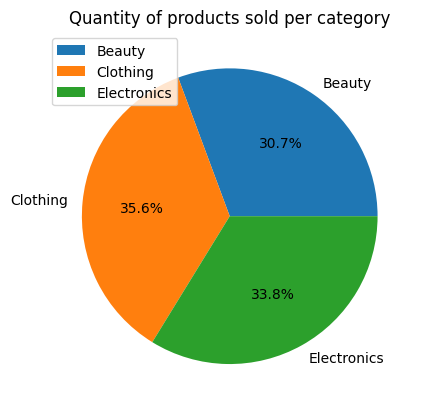

In [51]:
ax,fig=plt.subplots()
fig.set_title('Quantity of products sold per category')

plt.pie(amounts, labels=amounts.index, autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.show()

In [52]:
#who are the heaviest spenders : male/female
result=df.groupby('Gender')['Total Amount'].sum()

result


Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

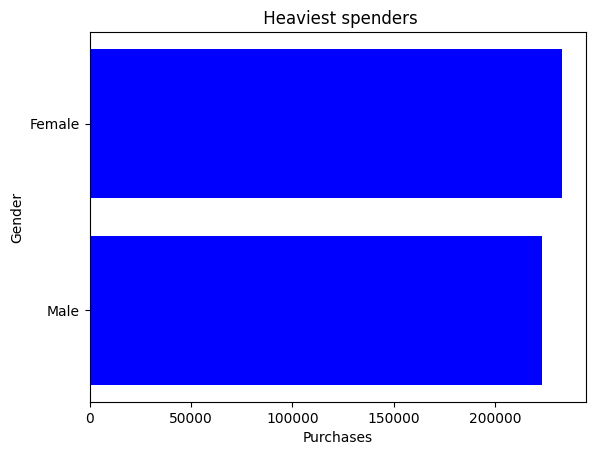

In [54]:
fig, ax = plt.subplots()

ax.barh(result.index, result.values, color='blue')

ax.invert_yaxis()  
ax.set_xlabel('Purchases')
ax.set_ylabel('Gender')
ax.set_title(' Heaviest spenders')

plt.show()

In [57]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [58]:
#segment into age groups and see who are the heaviest spenders

#create 5 bins
bins=[0,20,30,40,50,60,100]
labels=['<20','20-30','30-40','40-50','50-60','>60']

df['Age Group']=pd.cut(df['Age'], bins=bins, labels=labels)

df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,30-40
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,20-30
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,40-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,30-40
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,20-30


In [59]:
spendings_by_age=df.groupby('Age Group')['Total Amount'].sum()
spendings_by_age

/var/folders/f0/8zss9bcx2pq3p607h6tvt1sr0000gn/T/ipykernel_3707/2196476482.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spendings_by_age=df.groupby('Age Group')['Total Amount'].sum()


Age Group
<20       34730
20-30     98215
30-40     95950
40-50     93795
50-60    100085
>60       33225
Name: Total Amount, dtype: int64

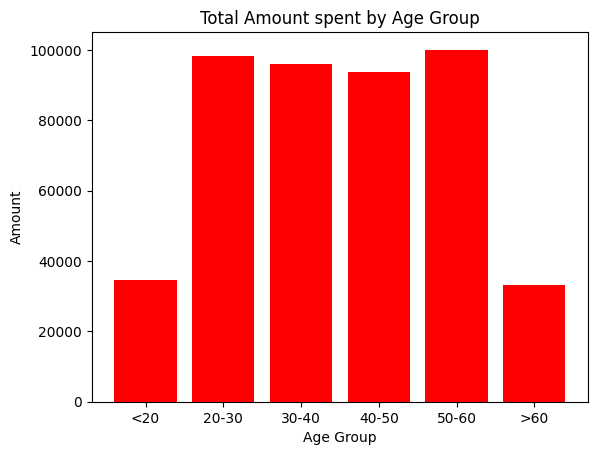

In [61]:
ax,fig=plt.subplots()
fig.set_title('Total Amount spent by Age Group')
fig.set_xlabel('Age Group')
fig.set_ylabel('Amount')
plt.bar(spendings_by_age.index,spendings_by_age.values, color='red')
plt.show()